In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colonpolyp/readme.txt
/kaggle/input/colonpolyp/ihcData.xlsx
/kaggle/input/colonpolyp/colonVideosWithLabels.xlsx
/kaggle/input/colonpolyp/pathoImagesWithLabels.xlsx
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient120-polyp1-F-26-ascending-nonneoplastic-inflamatuar-5-negative-negative-weak-0-1-42-1.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient27-polyp2-M-63-rectum-neoplastic-tubulovillous-50-negative-negative-negative-60-2-41-70.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient23-polyp1-M-77-sigmoid-nonneoplastic-hyperplastic-20-weak-weak-weak-65-2-54-10.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient34-polyp1-M-59-descending-nonneoplastic-inflamatuar-15-negative-negative-weak-30-2-46-10.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient49-polyp1-M-65-rectum-neoplastic-tubular-50-negative-negative-weak-60-2-43-50.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient180-polyp1-M-66-descen

In [21]:
file_path = "/kaggle/input/colonpolyp/colonVideosWithLabels.xlsx"
df = pd.read_excel(file_path)
# Find the number of unique patients
unique_patients = df['patient'].nunique()

# Find the unique combinations of patients and polyps
unique_patient_polyp_combinations = df.groupby(['patient', 'polyp']).size().reset_index().rename(columns={0: 'count'})

# Print the results
print("Number of Unique Patients:", unique_patients)
print("Number of Unique Polyps:", df['polyp'].count().sum())

Number of Unique Patients: 132
Number of Unique Polyps: 133


In [22]:
import pandas as pd

# Dosyaları yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
colon_video_path = "/kaggle/input/colonpolyp/colonVideosWithLabels.xlsx"
patho_image_path = "/kaggle/input/colonpolyp/pathoImagesWithLabels.xlsx"

ihc_df = pd.read_excel(ihc_path)
colon_video_df = pd.read_excel(colon_video_path)
patho_image_df = pd.read_excel(patho_image_path)

# İlk birkaç satırı göster
ihc_df.head(), colon_video_df.head(), patho_image_df.head()


(   ID  colon   patient   polyp gender  age    location           type  \
 0   1  colon  patient1  polyp1      M   53  descending  nonneoplastic   
 1   1  colon  patient1  polyp2      M   53  descending  nonneoplastic   
 2   1  colon  patient1  polyp3      M   53  descending  nonneoplastic   
 3   2  colon  patient2  polyp1      M   49   ascending  nonneoplastic   
 4   2  colon  patient2  polyp2      M   49  descending     neoplastic   
 
         subtype  Ki-67(clone30-9) BRAF(cloneV600E)  \
 0  hyperplastic              50.0         negative   
 1  hyperplastic              40.0         negative   
 2  hyperplastic              50.0         negative   
 3  hyperplastic              50.0         negative   
 4       villous              60.0         negative   
 
   PD-L1epithelium(clone SP142) PD-L1lymphocyte(clone SP142)  \
 0                     negative                     negative   
 1                     negative                     negative   
 2                     negativ

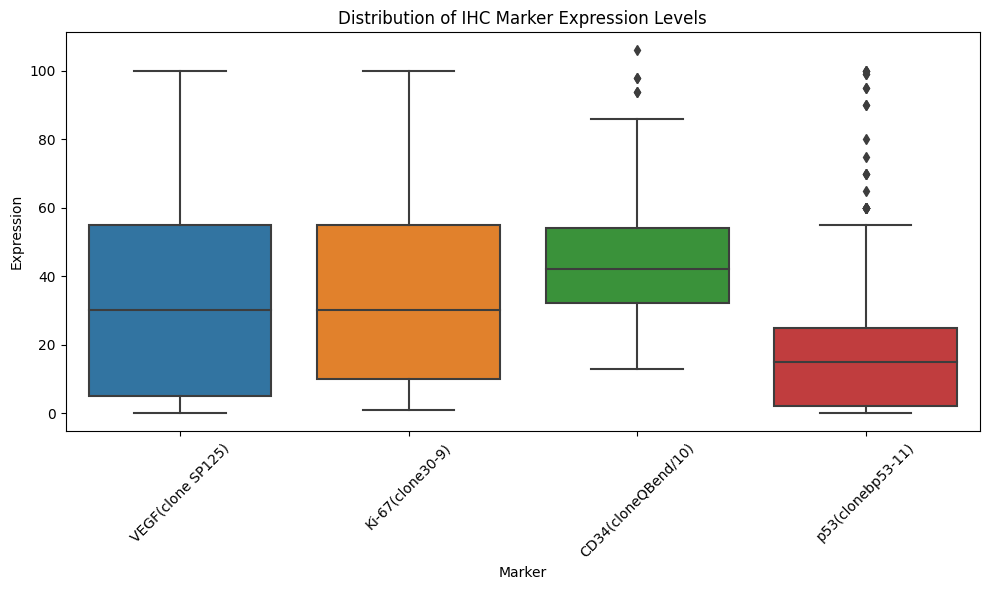

In [23]:
# Kernel reset sonrası tekrar yükleme
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolu
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
ihc_df = pd.read_excel(ihc_path)

# Hedef markerlar
markers = ["VEGF(clone SP125)", "Ki-67(clone30-9)", "CD34(cloneQBend/10)", "p53(clonebp53-11)"]

# Veriyi uzun formata getir ve boxplot çiz
plt.figure(figsize=(10, 6))
ihc_df_long = ihc_df[markers].melt(var_name="Marker", value_name="Expression")
sns.boxplot(data=ihc_df_long, x="Marker", y="Expression")
plt.title("Distribution of IHC Marker Expression Levels")
plt.xticks(rotation=45)
plt.tight_layout()
output_path = '/kaggle/working/markerBoxPlot.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


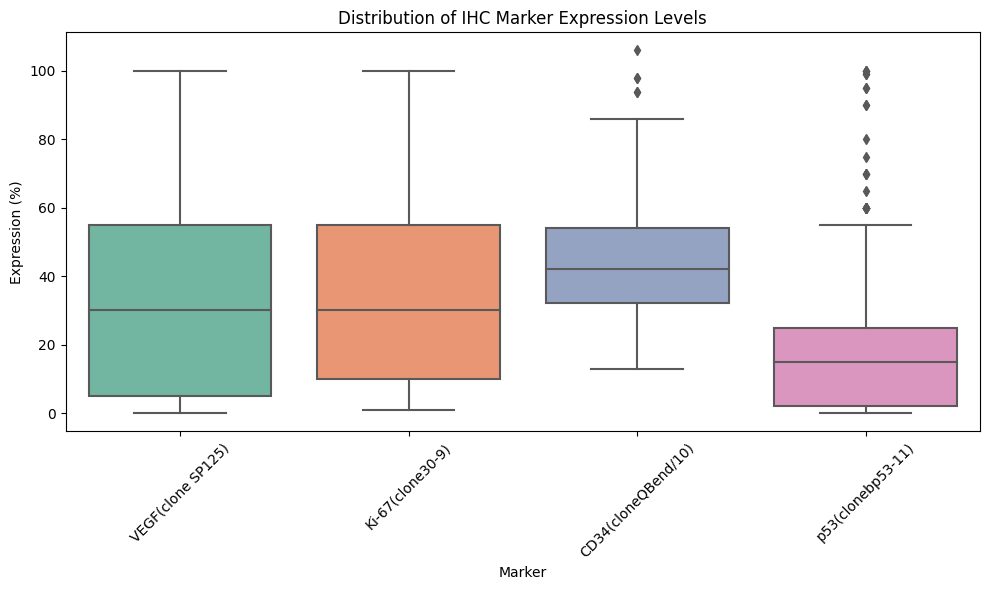

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Excel dosyasını oku
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
ihc_df = pd.read_excel(ihc_path)
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'

# Sütun adlarını düzenle (gerekiyorsa boşlukları temizle vs.)
ihc_df.columns = ihc_df.columns.str.replace(r'\n', '', regex=True).str.strip()

# Sayısal olarak ölçülen markerlar (yüzdelik veya skor)
numeric_markers = ["VEGF(clone SP125)", "Ki-67(clone30-9)", "CD34(cloneQBend/10)", "p53(clonebp53-11)"]

# Uzun formata çevir
ihc_df_long = ihc_df[numeric_markers].melt(var_name="Marker", value_name="Expression")

# Boxplot çiz
plt.figure(figsize=(10, 6))
sns.boxplot(data=ihc_df_long, x="Marker", y="Expression", palette="Set2")
plt.title("Distribution of IHC Marker Expression Levels")
plt.xlabel("Marker")
plt.ylabel("Expression (%)")
plt.xticks(rotation=45)
plt.tight_layout()

# Kaydetme
output_path = "/kaggle/working/IHC_Boxplot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


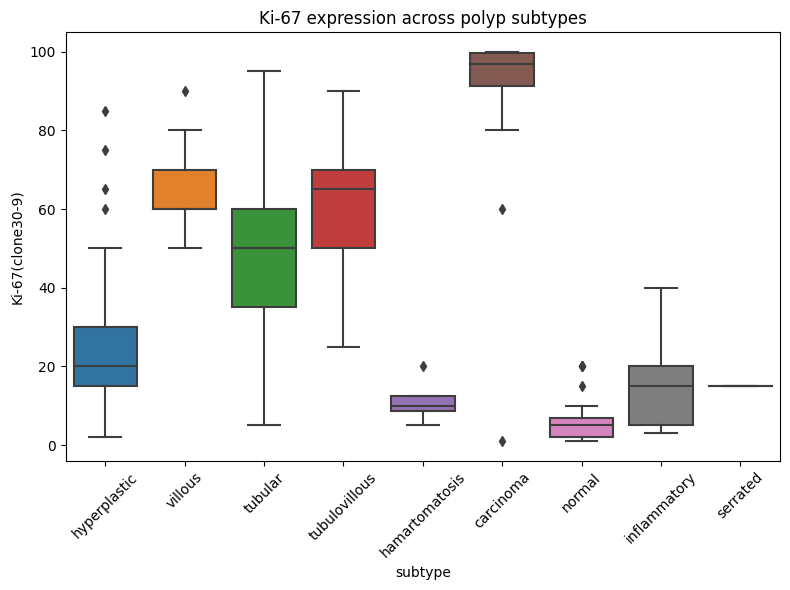

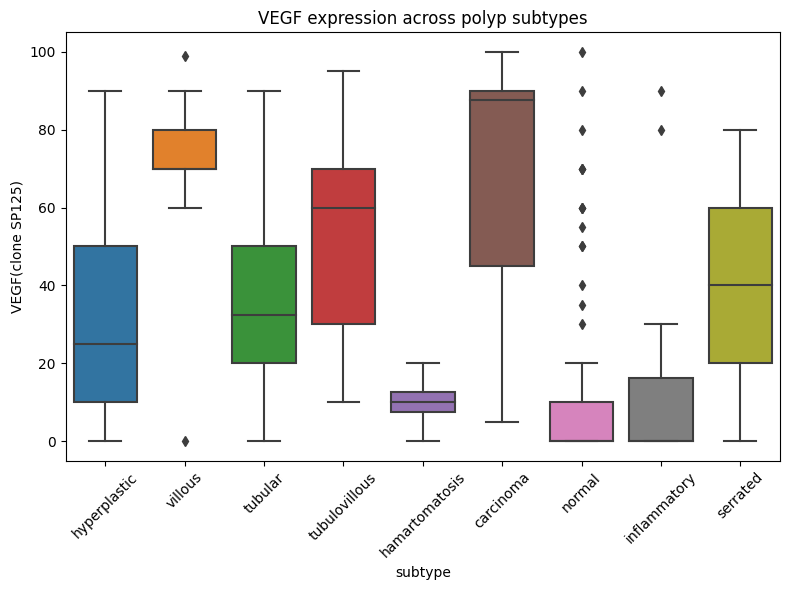

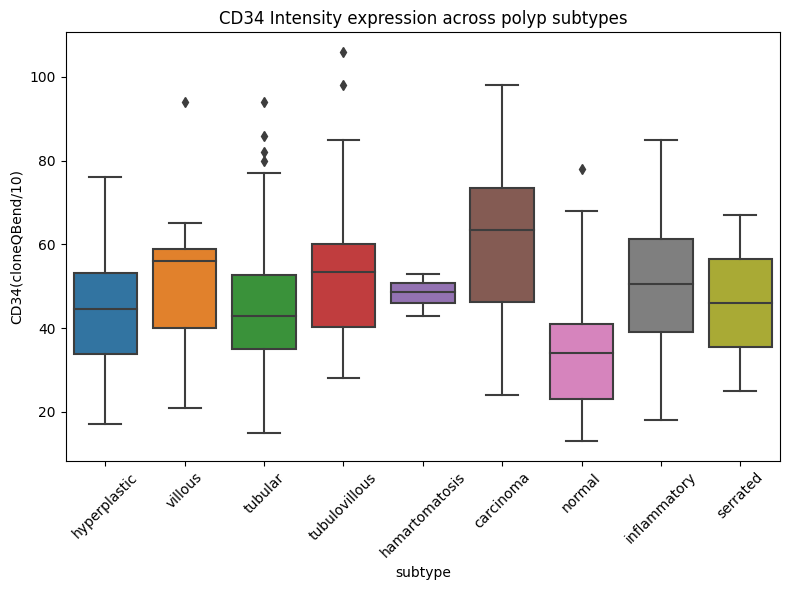

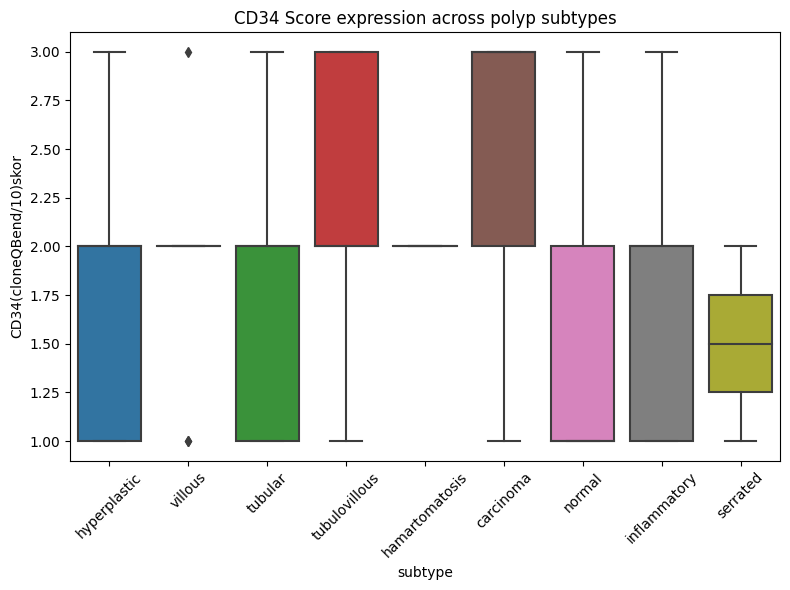

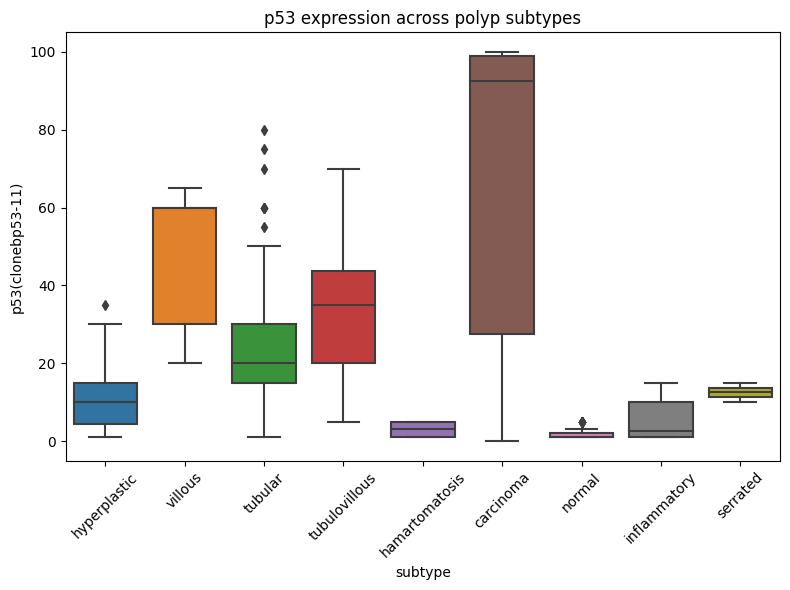

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


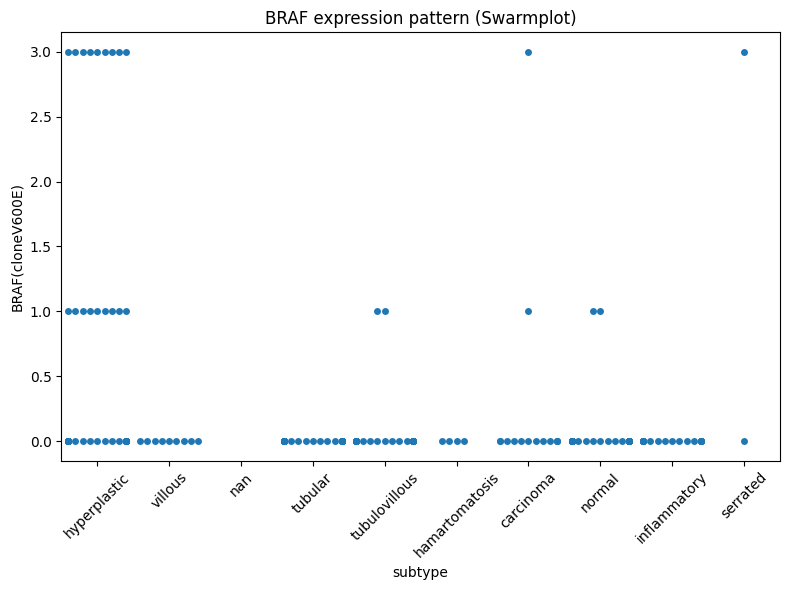

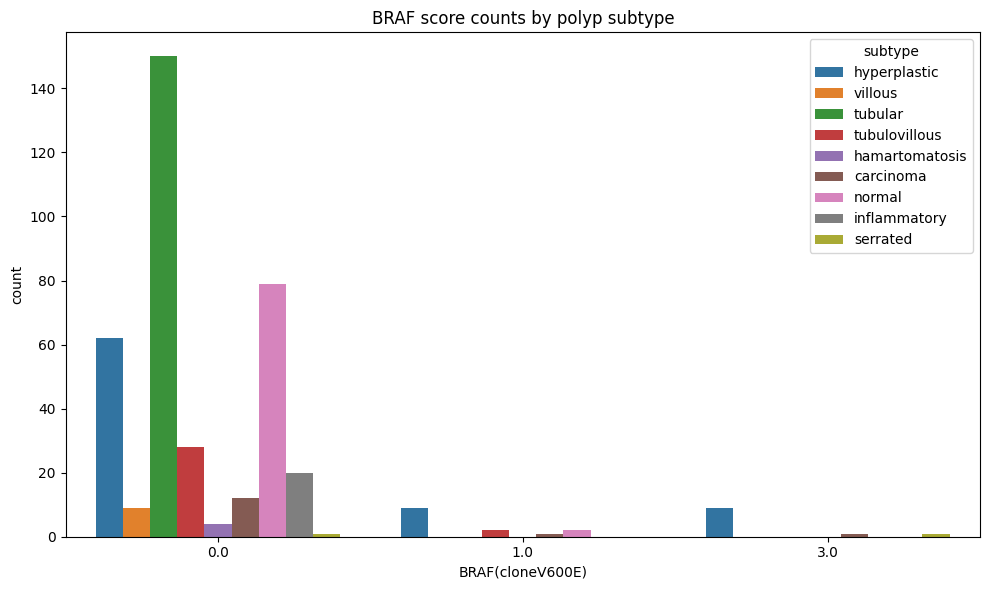

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


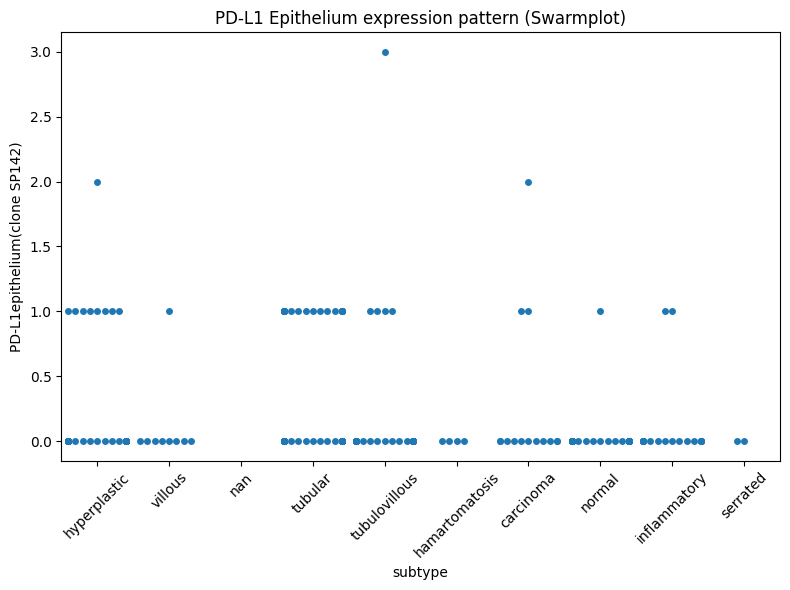

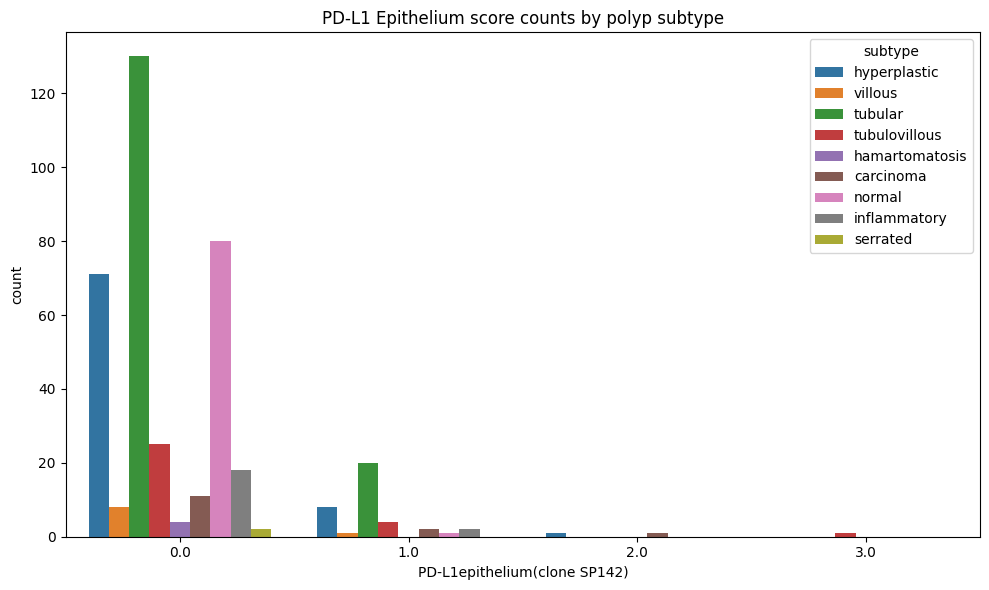

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


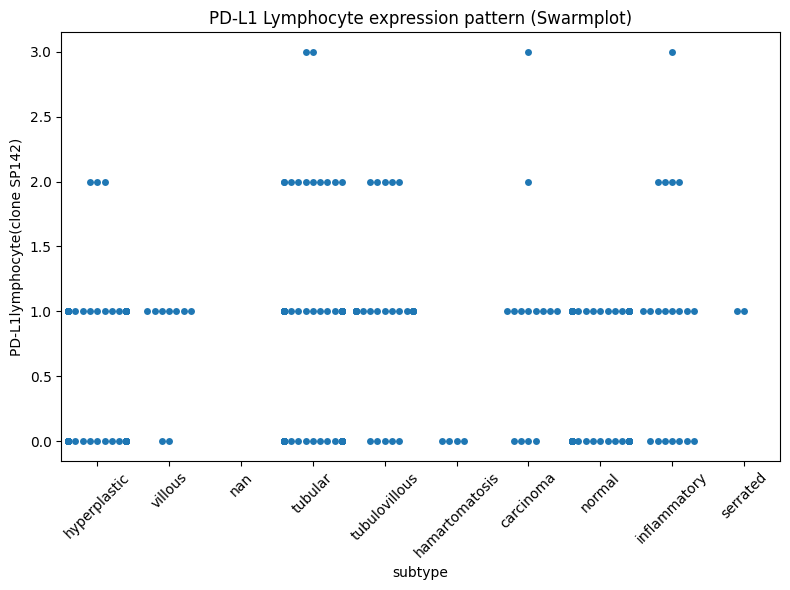

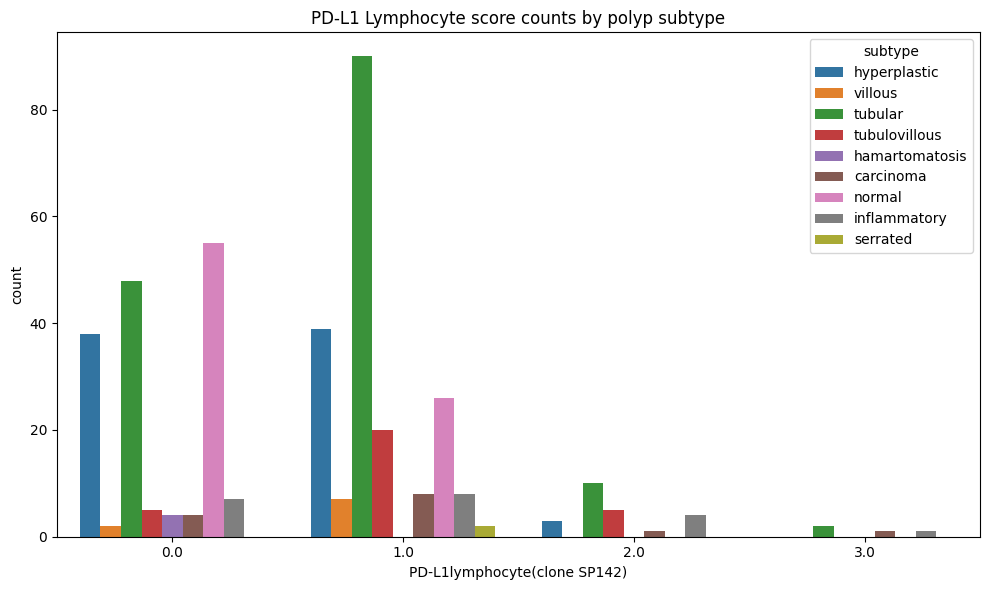

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Dosya yükleme
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'

# Ordinal dönüşüm (kategorikler için)
score_map = {"negative": 0, "weak": 1, "moderate": 2, "strong": 3}

categorical_markers = [
    "BRAF(cloneV600E)",
    "PD-L1epithelium(clone SP142)",
    "PD-L1lymphocyte(clone SP142)"
]

for col in categorical_markers:
    df[col] = df[col].map(score_map)

# Marker listeleri
numerical_markers = {
    "Ki-67": "Ki-67(clone30-9)",
    "VEGF": "VEGF(clone SP125)",
    "CD34 Intensity": "CD34(cloneQBend/10)",
    "CD34 Score": "CD34(cloneQBend/10)skor",
    "p53": "p53(clonebp53-11)"
}

ordinal_markers = {
    "BRAF": "BRAF(cloneV600E)",
    "PD-L1 Epithelium": "PD-L1epithelium(clone SP142)",
    "PD-L1 Lymphocyte": "PD-L1lymphocyte(clone SP142)"
}

# Klasörler
boxplot_dir = "/kaggle/working/ihc_boxplots"
swarm_dir = "/kaggle/working/ihc_swarmplots"
os.makedirs(boxplot_dir, exist_ok=True)
os.makedirs(swarm_dir, exist_ok=True)

# Boxplot: Sayısal markerlar
for label, col in numerical_markers.items():
    safe_label = re.sub(r"[^\w]", "_", label)
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="subtype", y=col)
    plt.title(f"{label} expression across polyp subtypes")
    plt.xticks(rotation=45)
    plt.tight_layout()
    filename = f"{boxplot_dir}/{safe_label}_boxplot.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

# Swarmplot + Countplot: Kategorik–ordinal markerlar
for label, col in ordinal_markers.items():
    safe_label = re.sub(r"[^\w]", "_", label)

    # Swarmplot
    plt.figure(figsize=(8, 6))
    sns.swarmplot(data=df, x="subtype", y=col)
    plt.title(f"{label} expression pattern (Swarmplot)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    filename_swarm = f"{swarm_dir}/{safe_label}_swarmplot.png"
    plt.savefig(filename_swarm)
    plt.show()

    # Countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue="subtype")
    plt.title(f"{label} score counts by polyp subtype")
    plt.xticks(rotation=0)
    plt.tight_layout()
    filename_count = f"{swarm_dir}/{safe_label}_countplot.png"
    plt.savefig(filename_count)
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

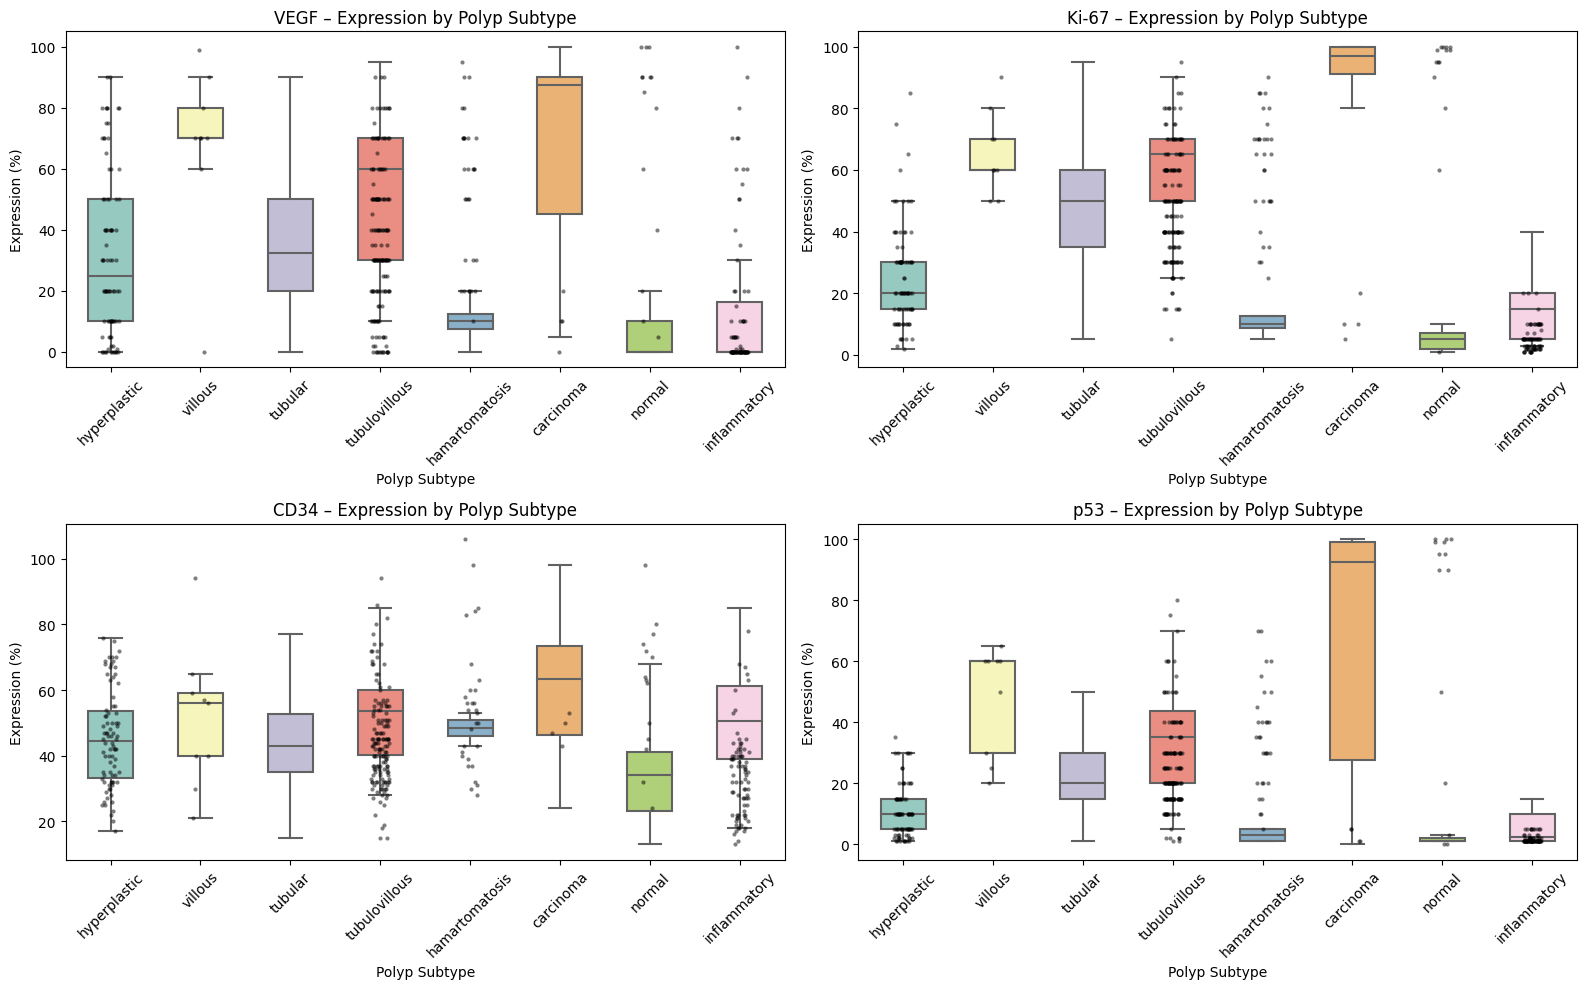

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Uyarıları bastır
warnings.filterwarnings("ignore", category=UserWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

# Dosya yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# Etiket düzeltmeleri
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'
df.loc[df['subtype'] == 'serrated', 'subtype'] = 'hyperplastic'

# Sürekli (numerik) markerlar
numeric_cols = [
    "VEGF(clone SP125)",
    "Ki-67(clone30-9)",
    "CD34(cloneQBend/10)",
    "p53(clonebp53-11)"
]

# Başlık eşleştirme
titles = {
    "VEGF(clone SP125)": "VEGF",
    "Ki-67(clone30-9)": "Ki-67",
    "CD34(cloneQBend/10)": "CD34",
    "p53(clonebp53-11)": "p53"
}

# Subplot düzeni (2x2 grid)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(numeric_cols):
    ax = axes[i // 2, i % 2]
    label = titles[col]

    # Boxplot + Stripplot
    sns.boxplot(data=df, x="subtype", y=col, ax=ax, width=0.5, fliersize=0, palette="Set3")
    sns.stripplot(data=df, x="subtype", y=col, ax=ax, color='black', size=3, jitter=True, alpha=0.5)
    ax.set_title(f"{label} – Expression by Polyp Subtype")
    ax.set_xlabel("Polyp Subtype")
    ax.set_ylabel("Expression (%)")
    ax.tick_params(axis='x', rotation=45)

# Kaydet ve göster
plt.tight_layout()
plt.savefig("/kaggle/working/Figure_IHC_Expression_BoxStripplot.png", dpi=300, bbox_inches='tight')
plt.show()


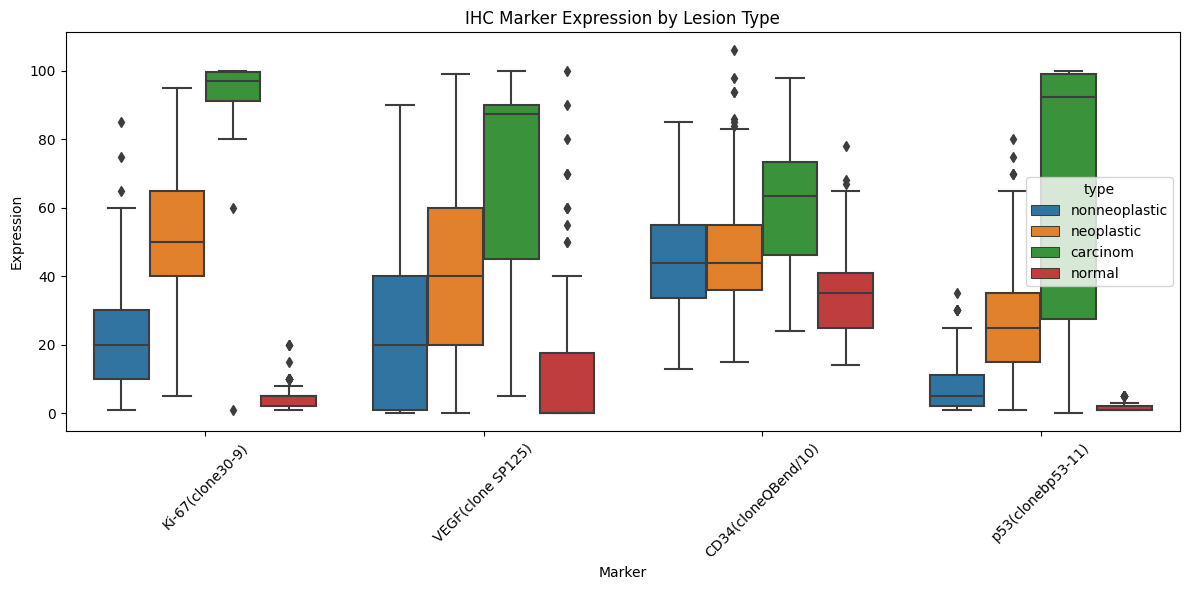

In [27]:
 # Kernel reset sonrası dosyayı yeniden yükleyelim ve grafik üretelim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolu
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
ihc_df = pd.read_excel(ihc_path)

# Markerlar ve grup bilgisi
markers = [
    "Ki-67(clone30-9)", "VEGF(clone SP125)", "CD34(cloneQBend/10)", "p53(clonebp53-11)"
]

# Gerekli sütunlar + dropna
group_df = ihc_df[["type"] + markers].dropna()

# Melt formatına çevir
df_melt = group_df.melt(id_vars="type", var_name="Marker", value_name="Expression")

# Grafik çiz
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melt, x="Marker", y="Expression", hue="type")
plt.title("IHC Marker Expression by Lesion Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/kaggle/working/Figure_Grouped_Boxplot_Types.png")
plt.show()


In [28]:
import pandas as pd
import scipy.stats as stats

# Veriyi yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# Alt tip isimlerini düzelt (gerekirse)
df['subtype'] = df['subtype'].replace({'carcinom': 'carcinoma', 'inflamatuar': 'inflammatory'})

# Test edilecek markerlar
markers = ["VEGF(clone SP125)", "Ki-67(clone30-9)", "CD34(cloneQBend/10)", "p53(clonebp53-11)"]

# Kruskal-Wallis testi
results = []
for marker in markers:
    grouped_data = [group[marker].dropna() for name, group in df.groupby("subtype")]
    stat, p = stats.kruskal(*grouped_data)
    results.append({'Marker': marker, 'Kruskal-Wallis H': stat, 'p-value': p})

# Sonuçları tablo olarak göster
result_df = pd.DataFrame(results)
print(result_df)

# Anlamlı sonuçları filtrele (p < 0.05)
significant = result_df[result_df["p-value"] < 0.05]
print("\nStatistically significant markers (p < 0.05):")
print(significant)


                Marker  Kruskal-Wallis H       p-value
0    VEGF(clone SP125)        106.617630  1.884441e-19
1     Ki-67(clone30-9)        267.580790  3.209722e-53
2  CD34(cloneQBend/10)         58.728978  8.270901e-10
3    p53(clonebp53-11)        243.368592  4.380103e-48

Statistically significant markers (p < 0.05):
                Marker  Kruskal-Wallis H       p-value
0    VEGF(clone SP125)        106.617630  1.884441e-19
1     Ki-67(clone30-9)        267.580790  3.209722e-53
2  CD34(cloneQBend/10)         58.728978  8.270901e-10
3    p53(clonebp53-11)        243.368592  4.380103e-48


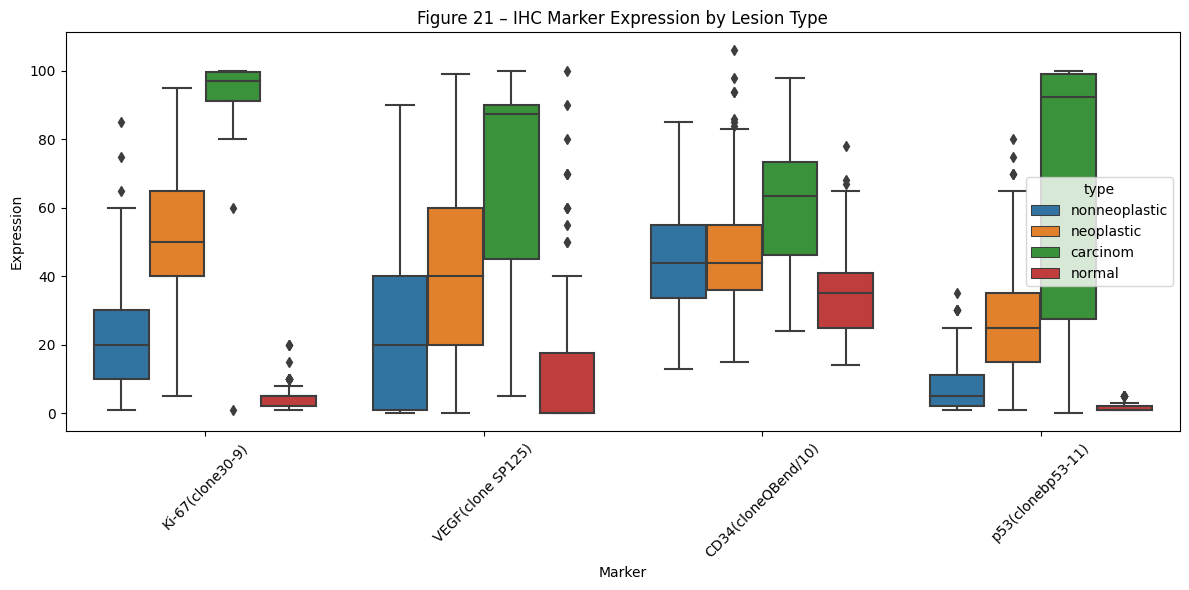

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dosya Yolu (Kaggle)
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# 2. Kullanılacak markerlar ve grup bilgisi
markers = [
    "Ki-67(clone30-9)",
    "VEGF(clone SP125)",
    "CD34(cloneQBend/10)",
    "p53(clonebp53-11)"
]

# 3. Gerekli sütunları al ve eksikleri çıkar
df_group = df[["type"] + markers].dropna()

# 4. Uzun formata çevir
df_melt = df_group.melt(id_vars="type", var_name="Marker", value_name="Expression")

# 5. Boxplot çiz
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melt, x="Marker", y="Expression", hue="type")
plt.title("Figure 21 – IHC Marker Expression by Lesion Type")
plt.xticks(rotation=45)
plt.tight_layout()

# 6. Kaydet ve göster
plt.savefig("Figure21_IHC_by_Type.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

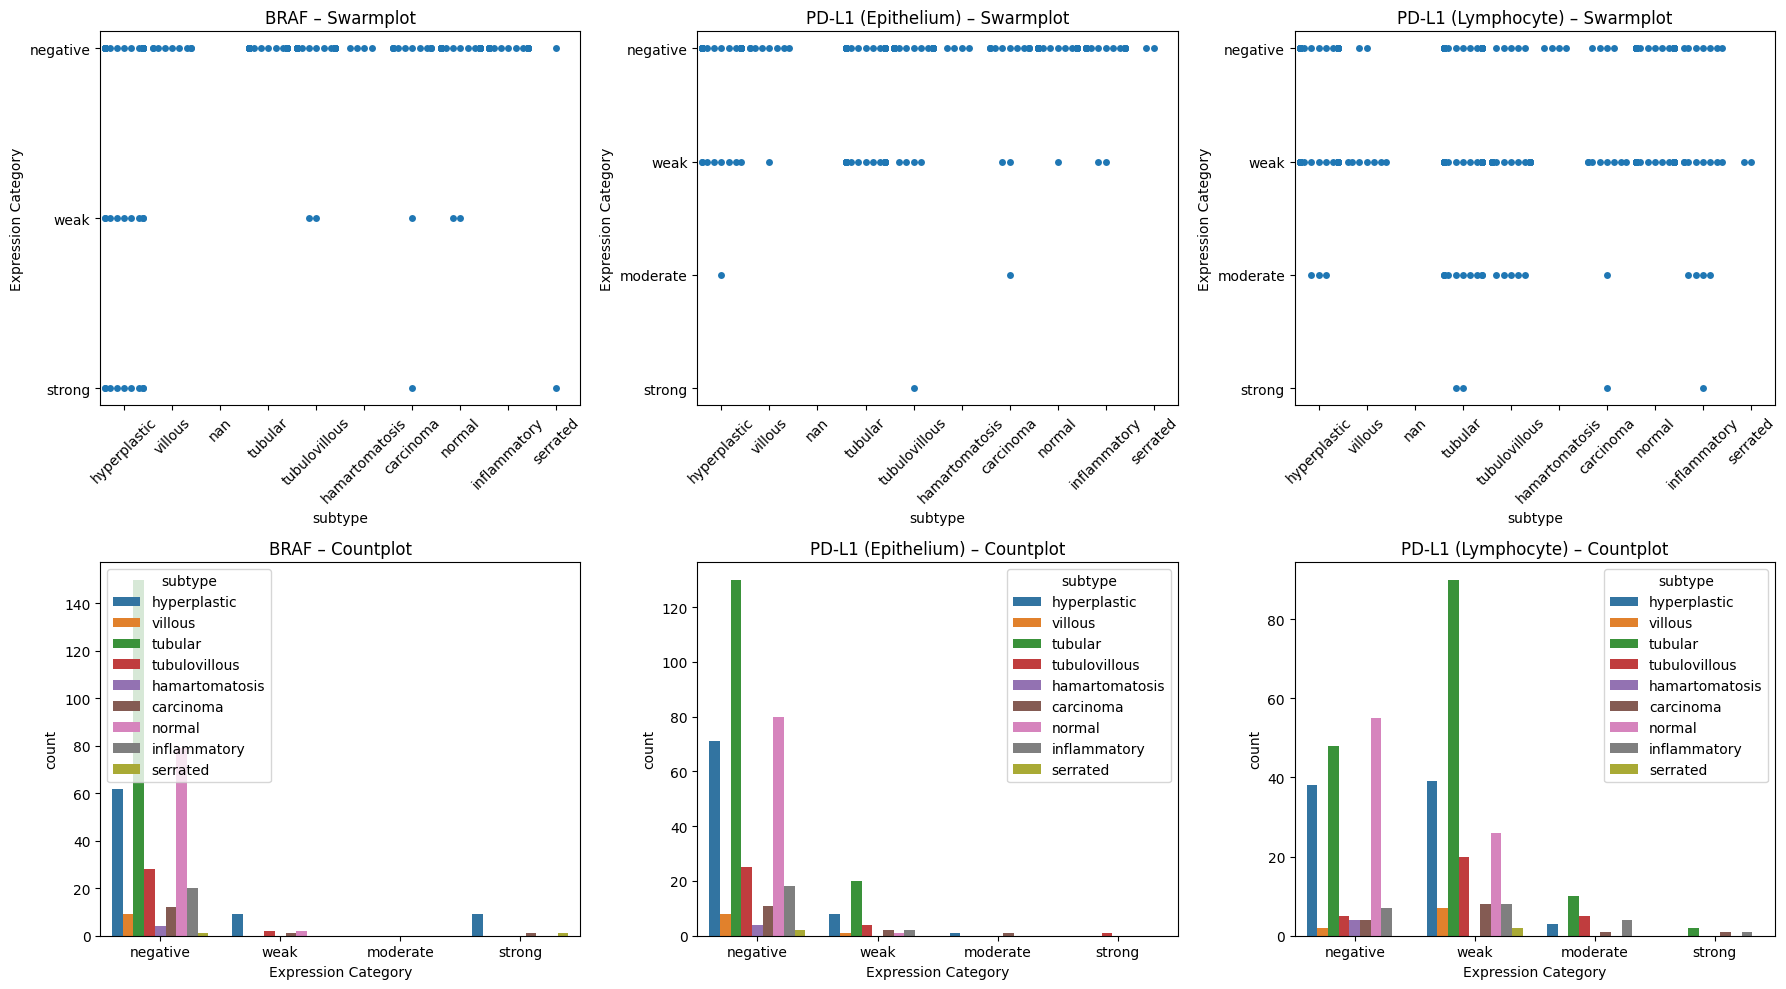

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Uyarıları bastır
warnings.filterwarnings("ignore", category=UserWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

# Dosya yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# Hatalı yazılmış subtype isimlerini düzelt
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'

# Kullanılacak kategorik marker sütunları (ordinal)
ordinal_cols = [
    "BRAF(cloneV600E)",
    "PD-L1epithelium(clone SP142)",
    "PD-L1lymphocyte(clone SP142)"
]

# Daha anlaşılır başlıklar için mapping
titles = {
    "BRAF(cloneV600E)": "BRAF",
    "PD-L1epithelium(clone SP142)": "PD-L1 (Epithelium)",
    "PD-L1lymphocyte(clone SP142)": "PD-L1 (Lymphocyte)"
}

# 3x2 subplot düzeni
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(ordinal_cols):
    label = titles[col]

    # Swarmplot (üst sıra)
    sns.swarmplot(data=df, x="subtype", y=col, ax=axes[0, i])
    axes[0, i].set_title(f"{label} – Swarmplot")
    axes[0, i].tick_params(axis='x', rotation=45)
    axes[0, i].set_ylabel("Expression Category")

    # Countplot (alt sıra)
    sns.countplot(data=df, x=col, hue="subtype", ax=axes[1, i],
                  order=["negative", "weak", "moderate", "strong"])
    axes[1, i].set_title(f"{label} – Countplot")
    axes[1, i].tick_params(axis='x', rotation=0)
    axes[1, i].set_xlabel("Expression Category")

# Kaydetme ve gösterim
plt.tight_layout()
plt.savefig("Figure20_OrdinalMarkers_Panel_Categoric.png", dpi=300)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

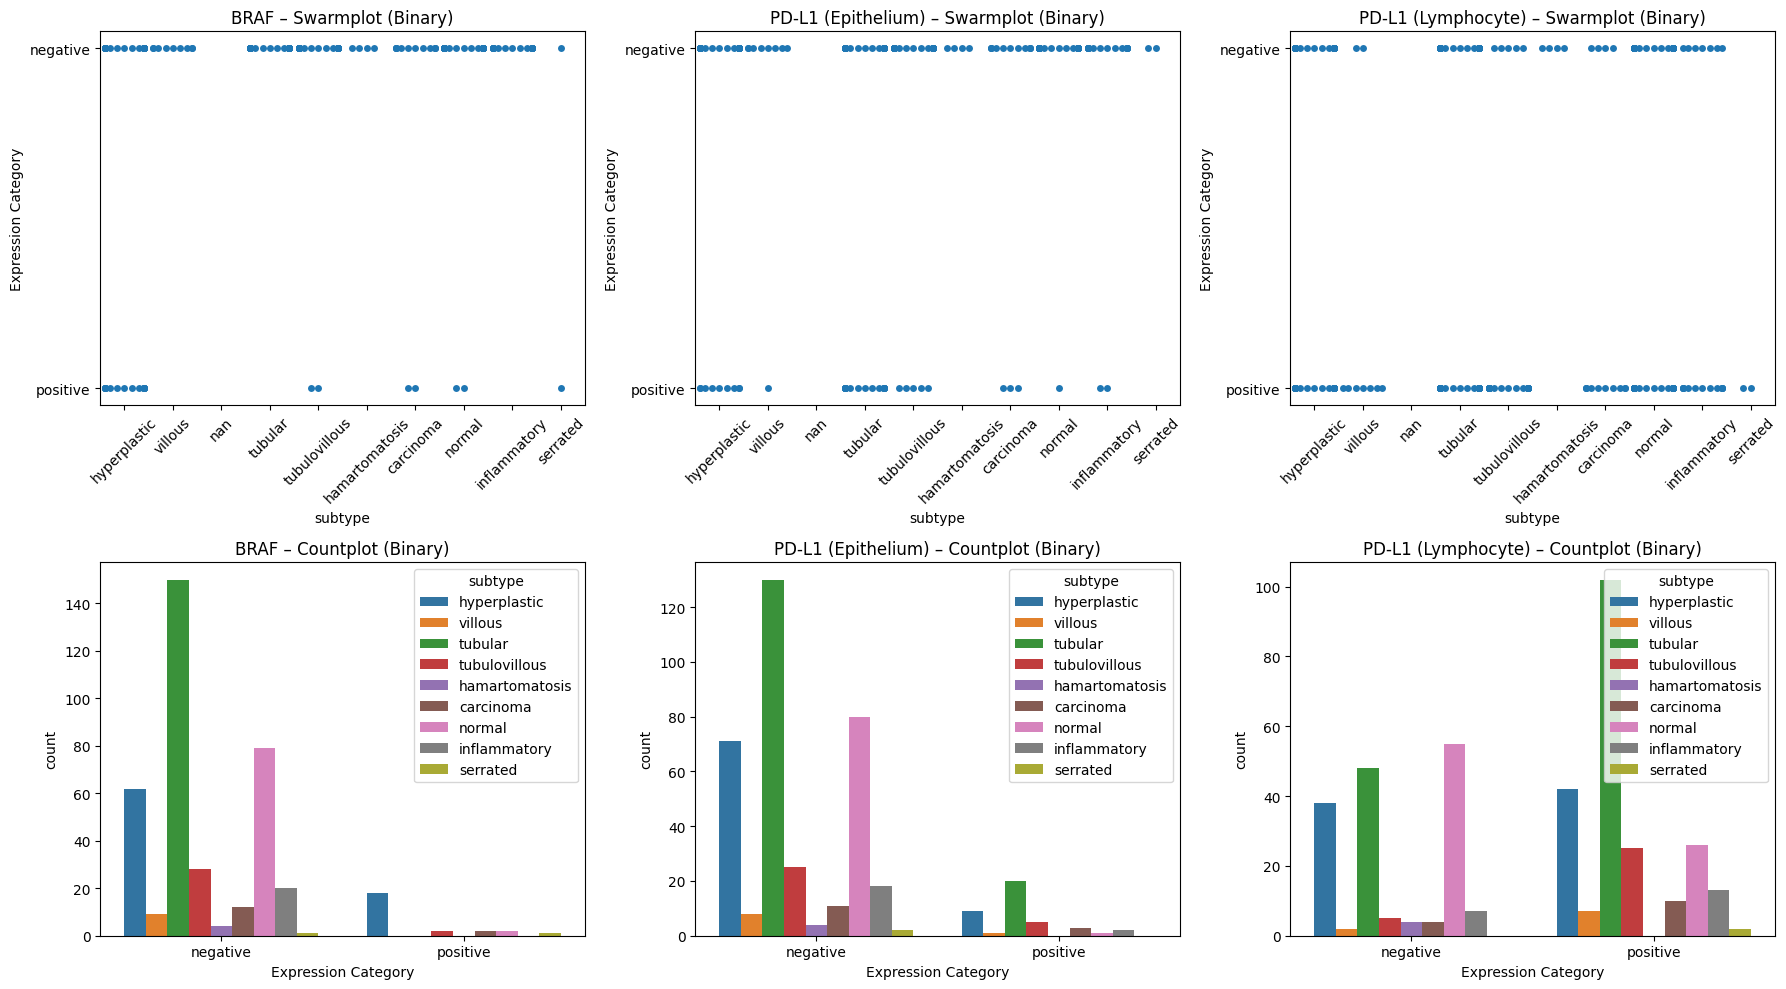

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları bastır
warnings.filterwarnings("ignore", category=UserWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

# Veri setini yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# Düzgün yazımı sağla
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'

# İlgili ordinal kolonlar
ordinal_cols = [
    "BRAF(cloneV600E)",
    "PD-L1epithelium(clone SP142)",
    "PD-L1lymphocyte(clone SP142)"
]

# Başlık eşlemesi
titles = {
    "BRAF(cloneV600E)": "BRAF",
    "PD-L1epithelium(clone SP142)": "PD-L1 (Epithelium)",
    "PD-L1lymphocyte(clone SP142)": "PD-L1 (Lymphocyte)"
}

# Kategorileri sadeleştir: positive / negative
for col in ordinal_cols:
    df[col] = df[col].replace(
        {"weak": "positive", "moderate": "positive", "strong": "positive"}
    )

# Grafik çizimi: 3x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(ordinal_cols):
    label = titles[col]

    # Swarmplot (üst sıra)
    sns.swarmplot(data=df, x="subtype", y=col, ax=axes[0, i])
    axes[0, i].set_title(f"{label} – Swarmplot (Binary)")
    axes[0, i].tick_params(axis='x', rotation=45)
    axes[0, i].set_ylabel("Expression Category")

    # Countplot (alt sıra)
    sns.countplot(data=df, x=col, hue="subtype", ax=axes[1, i],
                  order=["negative", "positive"])
    axes[1, i].set_title(f"{label} – Countplot (Binary)")
    axes[1, i].tick_params(axis='x', rotation=0)
    axes[1, i].set_xlabel("Expression Category")

# Görseli kaydet
plt.tight_layout()
plt.savefig("Figure20_OrdinalMarkers_BinaryCategoric.png", dpi=300)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

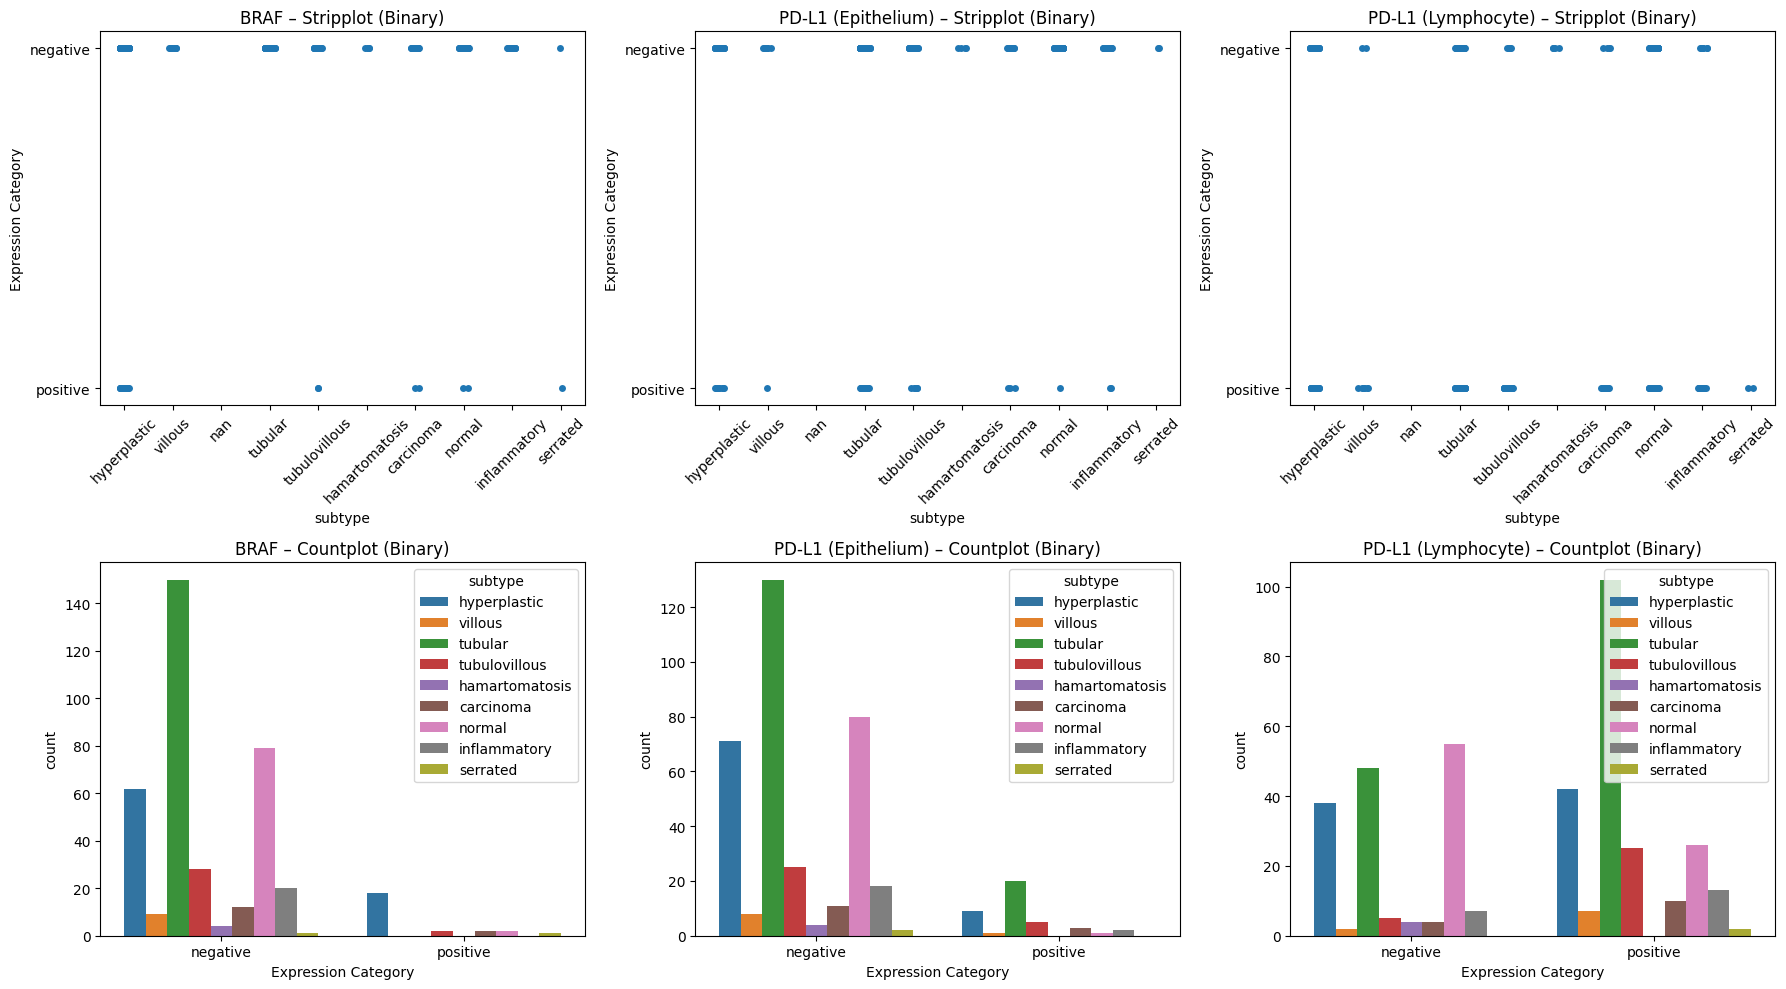

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları bastır
warnings.filterwarnings("ignore", category=UserWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

# Veri setini yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# Yazım düzeltmeleri
df['subtype'] = df['subtype'].replace({
    'carcinom': 'carcinoma',
    'inflamatuar': 'inflammatory'
})

# İlgili kolonlar
ordinal_cols = [
    "BRAF(cloneV600E)",
    "PD-L1epithelium(clone SP142)",
    "PD-L1lymphocyte(clone SP142)"
]

# Görselleştirme başlıkları
titles = {
    "BRAF(cloneV600E)": "BRAF",
    "PD-L1epithelium(clone SP142)": "PD-L1 (Epithelium)",
    "PD-L1lymphocyte(clone SP142)": "PD-L1 (Lymphocyte)"
}

# weak/moderate/strong → positive olarak birleştir
for col in ordinal_cols:
    df[col] = df[col].replace({
        "weak": "positive",
        "moderate": "positive",
        "strong": "positive"
    })

# Grafik çizimi (2 satır x 3 sütun: stripplot + countplot)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(ordinal_cols):
    label = titles[col]

    # Stripplot
    sns.stripplot(data=df, x="subtype", y=col, ax=axes[0, i], jitter=True)
    axes[0, i].set_title(f"{label} – Stripplot (Binary)")
    axes[0, i].tick_params(axis='x', rotation=45)
    axes[0, i].set_ylabel("Expression Category")

    # Countplot
    sns.countplot(data=df, x=col, hue="subtype", ax=axes[1, i],
                  order=["negative", "positive"])
    axes[1, i].set_title(f"{label} – Countplot (Binary)")
    axes[1, i].tick_params(axis='x', rotation=0)
    axes[1, i].set_xlabel("Expression Category")

# Kaydet ve göster
plt.tight_layout()
plt.savefig("Figure20_OrdinalMarkers_BinaryCategoric_Stripplot.png", dpi=300)
plt.show()


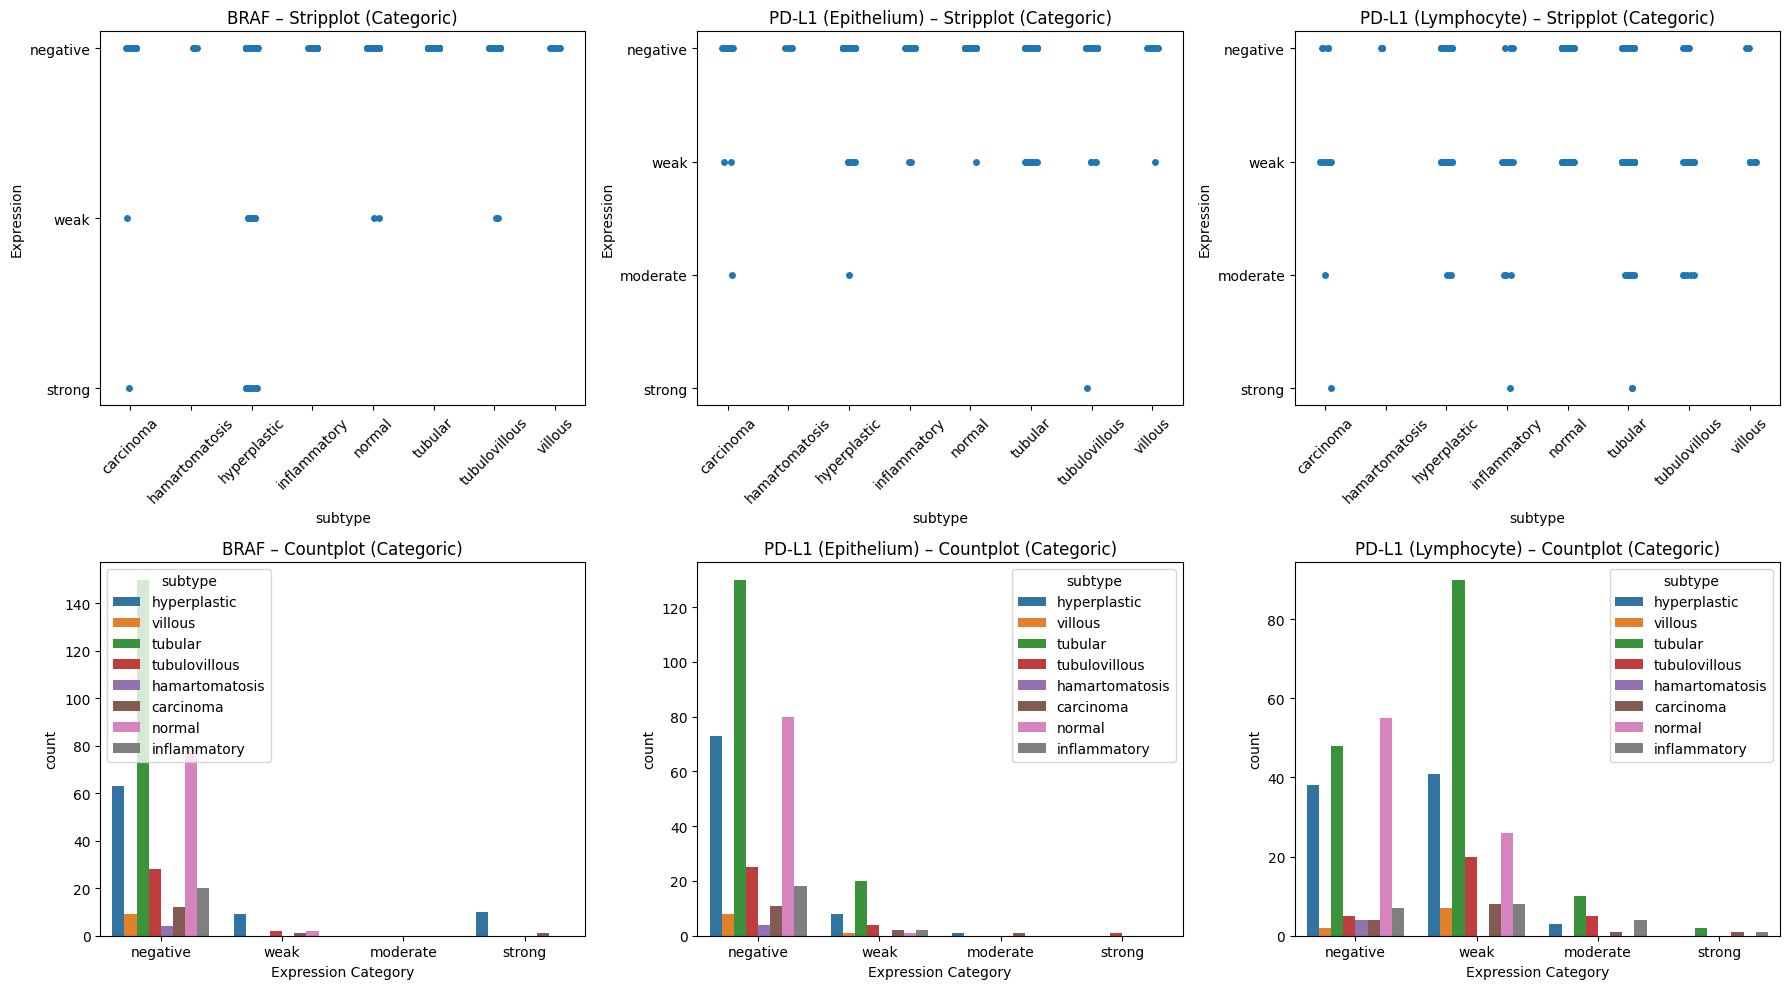

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Uyarıları bastır
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Veri setini yükle
ihc_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(ihc_path)

# Düzgün yazımı sağla
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'
df.loc[df['subtype'] == 'serrated', 'subtype'] = 'hyperplastic'

# İlgili ordinal kolonlar
ordinal_cols = [
    "BRAF(cloneV600E)",
    "PD-L1epithelium(clone SP142)",
    "PD-L1lymphocyte(clone SP142)"
]

# Başlık eşlemesi
titles = {
    "BRAF(cloneV600E)": "BRAF",
    "PD-L1epithelium(clone SP142)": "PD-L1 (Epithelium)",
    "PD-L1lymphocyte(clone SP142)": "PD-L1 (Lymphocyte)"
}

# Sıralı kategoriler
cat_order = ["negative", "weak", "moderate", "strong"]

# Grafik çizimi: 3x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(ordinal_cols):
    label = titles[col]

    if col not in df.columns:
        continue

    # NaN olanları çıkar
    clean_df = df[['subtype', col]].dropna()

    # Stripplot (üst sıra)
    sns.stripplot(data=clean_df, x="subtype", y=col, ax=axes[0, i],
                  order=sorted(df['subtype'].dropna().unique()), jitter=True)
    axes[0, i].set_title(f"{label} – Stripplot (Categoric)")
    axes[0, i].tick_params(axis='x', rotation=45)
    axes[0, i].set_ylabel("Expression")

    # Countplot (alt sıra)
    sns.countplot(data=clean_df, x=col, hue="subtype", ax=axes[1, i],
                  order=cat_order)
    axes[1, i].set_title(f"{label} – Countplot (Categoric)")
    axes[1, i].tick_params(axis='x', rotation=0)
    axes[1, i].set_xlabel("Expression Category")

# Kaydet
plt.tight_layout()
plt.savefig("Figure20_OrdinalMarkers_CategoricLevels.png", dpi=300)
plt.show()
